Real Helmholtz Narrowed 2cm
===========================

This uses the FEMME model RHelmSm2 which puts point 1A/mm2 currents through 2cm tall by 0.8cm thick coils centered at x=50cm, y=$\pm$24cm in a 1m radius sphere with 'infinite' boundary. This differs from the RealHelmholtz model in having the coils set 2cm closer together.

Start by loading some tools, including a set of FieldTools written specially for this task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import femm

In [2]:
import FieldGrids as fp

We build a VectorField and load data into from the model. At the moment we have to start by building a grid describing the data we are loading.

In [3]:
dg = fp.Grid(xlow=0.0, dx=0.1, xhigh=15.0, ylow=-15.0, dy=0.1, yhigh=15.0)
bsm2 = fp.VectorField(dg)
bsm2.LoadFemmFile('RHelmSm2.txt')

Just to prove the point, let's plot the data.

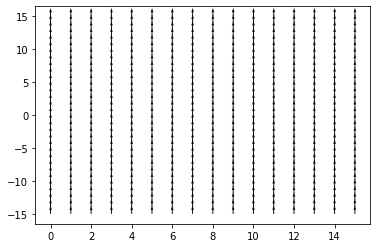

In [4]:
bsm2.VPlot(10)

That looks sensible, if not very revealing.

Visualizing the Non-Uniformity
------------------------------

As before, we can get a look at the wiggles if we blow up the x component of the field and do a stream plot.

<AxesSubplot:>

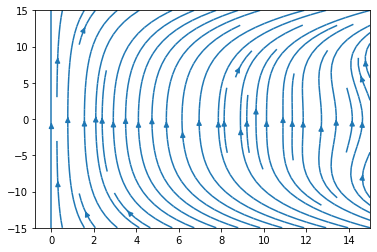

In [5]:
zbsm2 = fp.VectorField(bsm2)
zbsm2.u *= 100
zbsm2.StreamPlot()

Well, to my eye that is very similar to the pure Helmholtz version. GOOD.

Let's probe into the non-uniformity using the same technique as before.

The Non-Uniform Part of the Field
---------------------------------

A more instructive view is to look at the magnitude of the difference between this field magnitude and a uniform field matching the center value. I start by constructing this difference field and scale it to the central field. This gives us values which are fractional deviations from the central field. They are easier to interpret.

<Axes3DSubplot:>

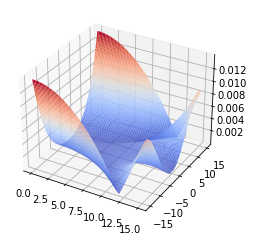

In [6]:
bmag = bsm2.Mag()
B0 = bmag.u[150,0]
bsm2diff = fp.ScalarField(bmag)
bsm2diff.u = np.abs(bsm2diff.u - B0 + 1e-9)
bsm2diff.u /= B0
bsm2diff.Splot(2)

So that agrees with the previous plot and we can now look it at in a contour plot with logarithmic contour levels, which should strongly resemble the previous contour plot.

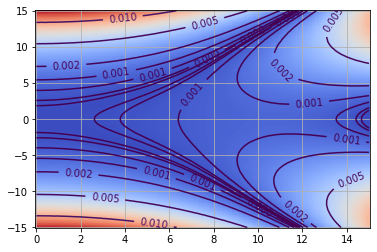

In [7]:
cax = bsm2diff.Cplot([1e-4,2e-4,5e-4,1e-3,2e-3,5e-3,1e-2,2e-2,5e-2,1e-1,2e-1])
cax.grid(axis='both')

Ooh yes, that is *seriously* worse than before! It is clear that our usable region has shrunk dramatically. Well have to put different radius circles on our useable region plot.

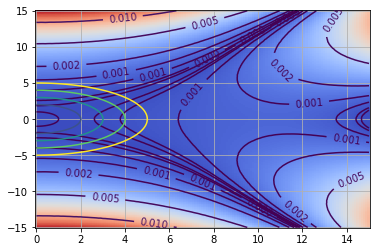

In [8]:
rf = fp.ScalarField(bmag)
rf.u = np.sqrt(rf.x * rf.x + rf.y * rf.y)
cax = bsm2diff.Cplot([1e-4,2e-4,5e-4,1e-3,2e-3,5e-3,1e-2,2e-2,5e-2,1e-1,2e-1])
cax.grid(axis='both')
cax.contour(rf.x,rf.y,rf.u,levels=[1.0, 2.0,3,4,5])

So, with the coils narrowed by 2cm (only a 4% decrease in spacing) we have decreased our working volume from nearly 6cm radius to barely 2cm.

The work on the widened case suggests the we repeat this analysis with a new target value of B. Let's start by looking at B on axis.

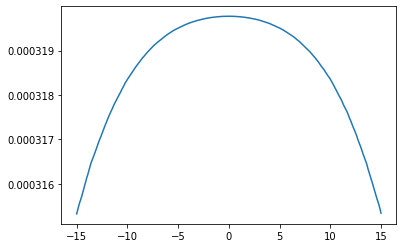

In [9]:
plt.plot(bmag.y[:,0],bmag.u[:,0])

So this time we want an average that is $10^{-4}$ less than the peak value.

(0.000319, 0.00032)

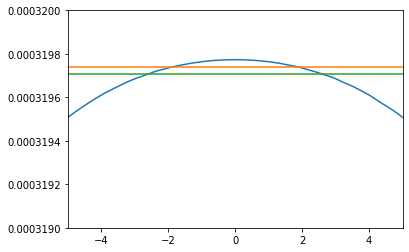

In [10]:
BMax = np.max(bmag.u[:,0])
BAv = (1.0 - 1e-4) * BMax
BLow =  (1.0 - 2e-4) * BMax
aline = np.zeros_like(bmag.u[:,0])
aline += BAv
lline = np.zeros_like(bmag.u[:,0])
lline += BLow
plt.plot(bmag.y[:,0],bmag.u[:,0])
plt.plot(bmag.y[:,0],aline)
plt.plot(bmag.y[:,0],lline)
plt.xlim((-5,5))
plt.ylim((0.000319, 0.00032))

So let's re-make the contour plot using this new target field.

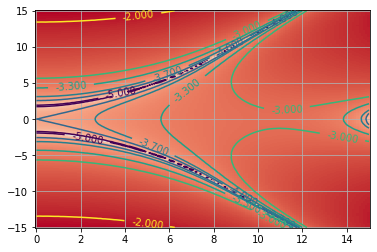

In [11]:
bmd3 = fp.ScalarField(bmag)
bmd3.u -= BAv
bmd3.u /= BAv
bmd3.u = np.log10(np.abs(bmd3.u))
cax = bmd3.Cplot([-5, -4, -3.7, -3.3, -3, -2])
cax.grid(axis='both')

So the result is that we get *exactly* the same useable region at the $10^{-4}$ level with a 4% under spacing as with a 4% over spacing.

Let's see what happens if we relax to the $3\times10^{-4}$ level. I guess that the right thing to do is to lower the desired average.

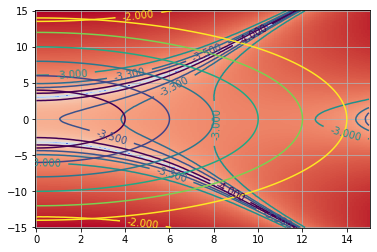

In [12]:
Bt = (1 - 3e-4) * BMax
bmd4 = fp.ScalarField(bmag)
bmd4.u -= Bt
bmd4.u /= Bt
bmd4.u = np.log10(np.abs(bmd4.u))
cax = bmd4.Cplot([-4, -3.5, -3.3, -3, -2])
cax.grid(axis='both')
cax.contour(rf.x,rf.y,rf.u,levels=[4, 6, 8, 10, 12, 14])

Here we do much worse than the over-wide case, getting only about 5 cm along the axis before we go beyond the $3\times10^{-4}$ limit.

With too-close spacing we could do much better in the transverse direction if we picked a different target field, but then we wold lose in the axial direction.

There is no getting round it, the Helmholtz configuration is *magic*!

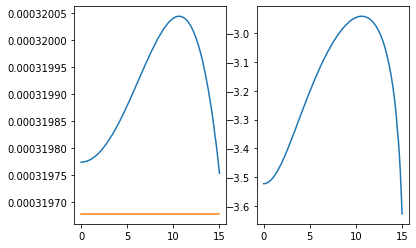

In [15]:
targetline = np.zeros_like(bmag.u[150,:]) + Bt
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=1.0)
axs[0].plot(bmag.x[150,:],bmag.u[150,:])
axs[0].plot(bmag.x[150,:],targetline)
axs[1].plot(bmag.x[150,:],bmd4.u[150,:])